In [60]:
import pandas as pd
import matplotlib.pyplot as plt

In [61]:
df = pd.read_csv(
    "/Users/oas/Documents/VOD/vod/DOCKER_STATS_LOG_QdrantLoggerTest.csv", delimiter=r"\s\s+", engine="python"
)

In [62]:
df = df.query("NAME != 'NAME'")

In [63]:
# change name of timestamp
columns = df.columns.tolist()
columns[0] = "TIMESTAMP"
df.columns = columns

In [64]:
df.TIMESTAMP = pd.to_datetime(df.TIMESTAMP)
df.TIMESTAMP = df.TIMESTAMP + pd.Timedelta(hours=1)


In [65]:
def convert_memory_usage(s):
    if "KiB" in s:
        return float(s.split("/")[0][:-4]) / 1024
    elif "MiB" in s:
        return float(s.split("/")[0][:-4])
    elif "GiB" in s:
        return float(s.split("/")[0][:-4]) * 1024
    else:
        return None

df["MEMORY_USAGE_MB"] = df["MEM USAGE / LIMIT"].apply(convert_memory_usage)


In [66]:
print("processes:", df.NAME.unique())

processes: ['milvus-minio' 'milvus-etcd' 'milvus-standalone' '0.00%'
 'hopeful_volhard' 'affectionate_villani']


In [67]:
def plot_memory_usage(df):
    for process in df.NAME.unique():
        df_subset = df.query(f"NAME == '{process}'")
        # t = range(0,len(memory_usage))
        plt.plot(df_subset.TIMESTAMP, df_subset.MEMORY_USAGE_MB, label=process, marker="x")
        plt.xticks(rotation=45)
        #plt.title(f"{process} memory usage")
        plt.xlabel("timestamp")
        plt.ylabel("Memory Usage (MiB)")
    plt.legend()

In [68]:
df = df.query("TIMESTAMP < '2024-01-24 19:27'")


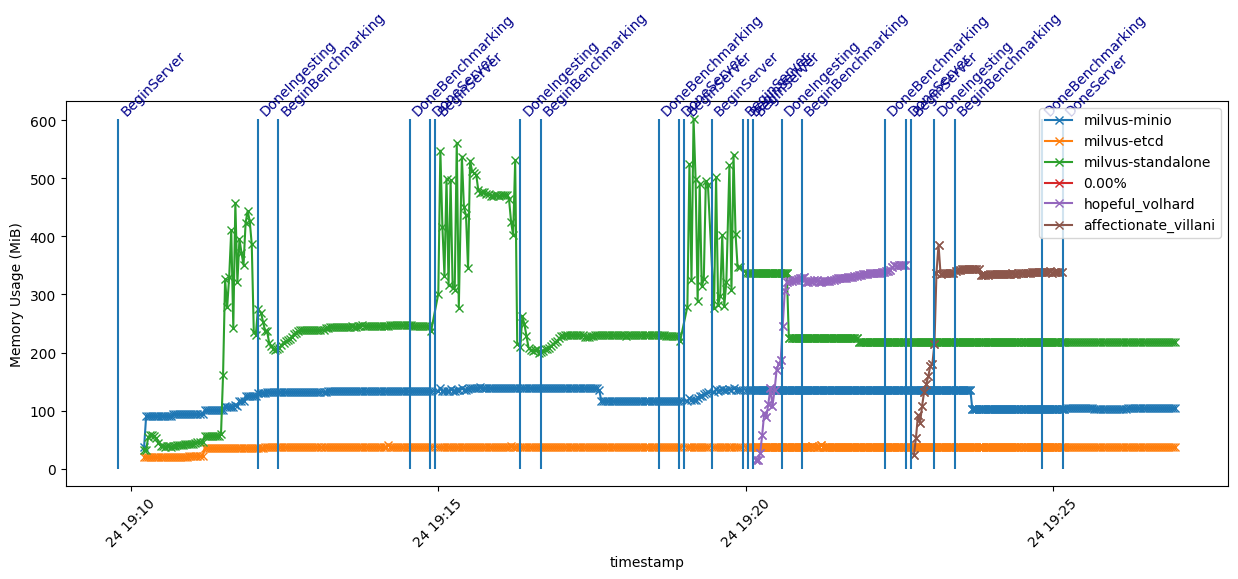

In [69]:
plt.figure(figsize=(15, 5))
plot_memory_usage(df)

_T = [
    ("BeginServer", "2024-01-24 19:09:48"),
    ("DoneIngesting", "2024-01-24 19:12:04"),
    ("BeginBenchmarking", "2024-01-24 19:12:24"),
    ("DoneBenchmarking", "2024-01-24 19:14:32"),
    ("DoneServer", "2024-01-24 19:14:52"),
    ("BeginServer", "2024-01-24 19:14:57"),
    ("DoneIngesting", "2024-01-24 19:16:20"),
    ("BeginBenchmarking", "2024-01-24 19:16:40"),
    ("DoneBenchmarking", "2024-01-24 19:18:35"),
    ("DoneServer", "2024-01-24 19:18:55"),
    ("BeginServer", "2024-01-24 19:19:00"),
    ("BeginServer", "2024-01-24 19:19:27"),
    ("BeginServer", "2024-01-24 19:19:57"),
    ("BeginServer", "2024-01-24 19:20:02"),
    ("BeginServer", "2024-01-24 19:20:07"),
    ("DoneIngesting", "2024-01-24 19:20:35"),
    ("BeginBenchmarking", "2024-01-24 19:20:55"),
    ("DoneBenchmarking", "2024-01-24 19:22:16"),
    ("DoneServer", "2024-01-24 19:22:36"),
    ("BeginServer", "2024-01-24 19:22:41"),
    ("DoneIngesting", "2024-01-24 19:23:04"),
    ("BeginBenchmarking", "2024-01-24 19:23:24"),
    ("DoneBenchmarking", "2024-01-24 19:24:49"),
    ("DoneServer", "2024-01-24 19:25:09"),
]

ts = [timestamp for _, timestamp in _T]
timestamps = pd.to_datetime(ts)

plt.vlines(timestamps, 0, df.MEMORY_USAGE_MB.max())
for label, timestamp in _T:
    plt.text(
        pd.to_datetime(timestamp),
        df.MEMORY_USAGE_MB.max(),
        label,
        rotation=45,
        verticalalignment="bottom",
        c="darkblue",
    )
plt.show()

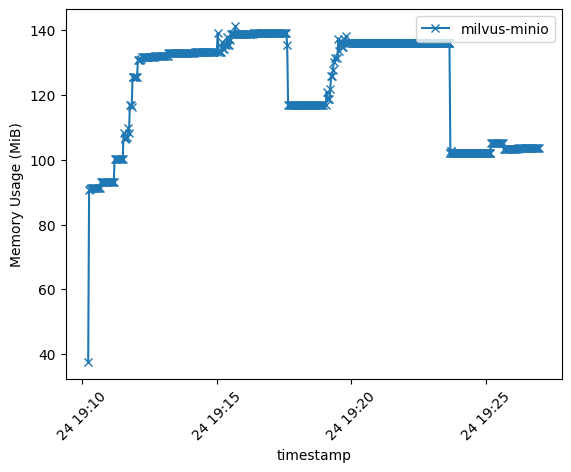

In [70]:
plot_memory_usage(df.query("NAME == 'milvus-minio'"))